In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import matplotlib.animation
#import png

In [3]:
def read_header(infile):
    """Read image header (first 512 bytes)
    """
    h = dict()
    fid = open(infile, 'r+b')
    h['filename'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 20))
    h['parent_filename'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 20))
    h['comments1'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 80))
    h['comments2'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 80))
    h['energy_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['config_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['file_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['trans_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['scan_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['data_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['date_modified'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 16))
    h['frequency'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['mat_velocity'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['num_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
    h['num_polarization_channels'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['spare00'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['adc_min_voltage'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['adc_max_voltage'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['band_width'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['spare01'] = np.fromfile(fid, dtype = np.int16, count = 5)
    h['polarization_type'] = np.fromfile(fid, dtype = np.int16, count = 4)
    h['record_header_size'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['word_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['word_precision'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['min_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['max_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['avg_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['data_scale_factor'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['data_units'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['surf_removal'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['edge_weighting'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['x_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['y_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['z_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['t_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['spare02'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['x_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['scan_orientation'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['scan_direction'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['data_storage_order'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['scanner_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['x_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['t_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['num_x_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
    h['num_y_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
    h['num_z_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
    h['num_t_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
    h['x_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['x_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['x_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['x_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['date_processed'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 8))
    h['time_processed'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 8))
    h['depth_recon'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['x_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['elevation_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['roll_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['azimuth_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['adc_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['spare06'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['scanner_radius'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['x_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['t_delay'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['range_gate_start'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['range_gate_end'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['ahis_software_version'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['spare_end'] = np.fromfile(fid, dtype = np.float32, count = 10)
    return h

In [4]:
def read_data(infile):
    """Read any of the 4 types of image files, returns a numpy array of the image contents
    """
    extension = os.path.splitext(infile)[1]
    h = read_header(infile)
    nx = int(h['num_x_pts'])
    ny = int(h['num_y_pts'])
    nt = int(h['num_t_pts'])
    fid = open(infile, 'rb')
    fid.seek(512) #skip header
    if extension == '.aps' or extension == '.a3daps':
        if(h['word_type']==7): #float32
            data = np.fromfile(fid, dtype = np.float32, count = nx * ny * nt)
        elif(h['word_type']==4): #uint16
            data = np.fromfile(fid, dtype = np.uint16, count = nx * ny * nt)
        data = data * h['data_scale_factor'] #scaling factor
        data = data.reshape(nx, ny, nt, order='F').copy() #make N-d image
    elif extension == '.a3d':
        if(h['word_type']==7): #float32
            data = np.fromfile(fid, dtype = np.float32, count = nx * ny * nt)
        elif(h['word_type']==4): #uint16
            data = np.fromfile(fid, dtype = np.uint16, count = nx * ny * nt)
        data = data * h['data_scale_factor'] #scaling factor
        data = data.reshape(nx, nt, ny, order='F').copy() #make N-d image
    elif extension == '.ahi':
        data = np.fromfile(fid, dtype = np.float32, count = 2* nx * ny * nt)
        data = data.reshape(2, ny, nx, nt, order='F').copy()
        real = data[0,:,:,:].copy()
        imag = data[1,:,:,:].copy()
    fid.close()
    if extension != '.ahi':
        return data
    else:
        return real, imag

In [5]:
matplotlib.rc('animation', html='html5')

def plot_image(path):
    data = read_data(path)
    fig = mpl.pyplot.figure(figsize = (16,16))
    ax = fig.add_subplot(111)
    def animate(i):
        im = ax.imshow(np.flipud(data[:,:,i].transpose()), cmap = 'viridis')
        return [im]
    return matplotlib.animation.FuncAnimation(fig, animate, frames=range(0,data.shape[2]), interval=200, blit=True)

KeyError: u'Unrecognized key "animation.html" for group "animation" and name "html"'

In [6]:
#plot_image("./images/496ec724cc1f2886aac5840cf890988a.aps")

In [15]:
data =read_data("./images/0367394485447c1c3485359ba71f52cb.aps")

In [16]:
data.shape

(512, 660, 16)

In [17]:
data[:,:,12].shape

(512, 660)

In [18]:
big[200]

NameError: name 'big' is not defined

In [19]:
q = data[:, 220:660, :]

In [20]:
q[0].shape

(440, 16)

(0, 340)
(512, 660, 16)
(342, 660)


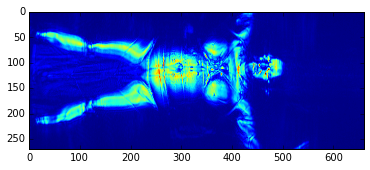

(10, 350)
(512, 660, 16)
(322, 660)


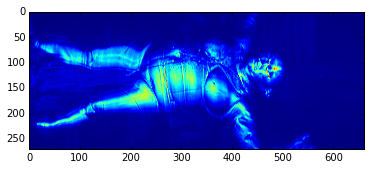

(20, 360)
(512, 660, 16)
(302, 660)


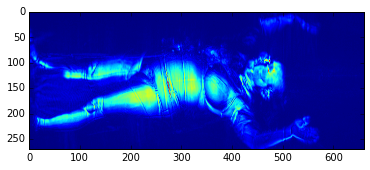

(30, 370)
(512, 660, 16)
(282, 660)


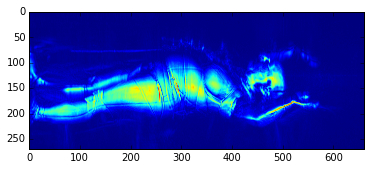

(40, 380)
(512, 660, 16)
(262, 660)


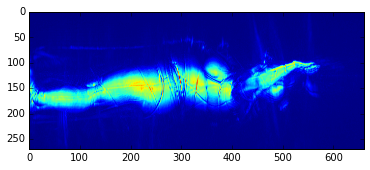

(50, 390)
(512, 660, 16)
(242, 660)


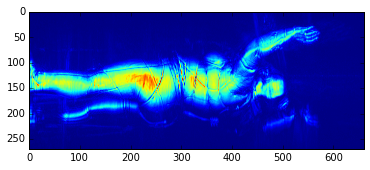

(60, 400)
(512, 660, 16)
(222, 660)


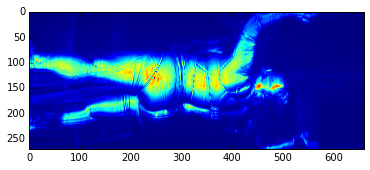

(70, 410)
(512, 660, 16)
(202, 660)


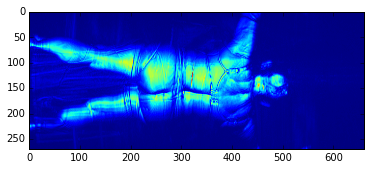

(80, 420)
(512, 660, 16)
(182, 660)


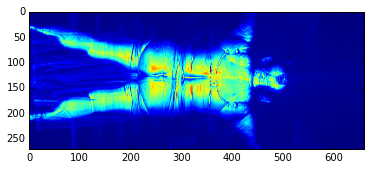

(90, 430)
(512, 660, 16)
(162, 660)


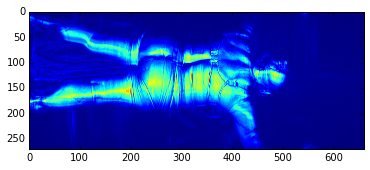

(100, 440)
(512, 660, 16)
(142, 660)


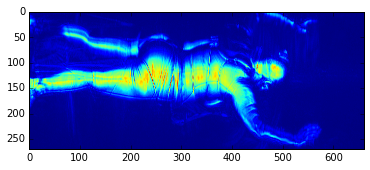

(110, 450)
(512, 660, 16)
(122, 660)


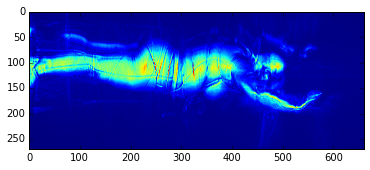

(120, 460)
(512, 660, 16)
(102, 660)


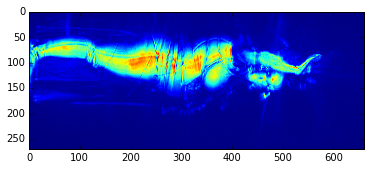

(130, 470)
(512, 660, 16)
(82, 660)


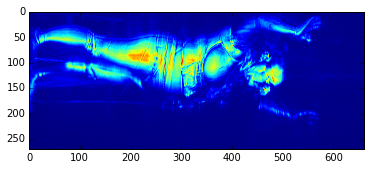

(140, 480)
(512, 660, 16)
(62, 660)


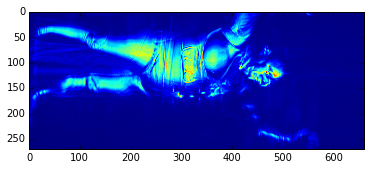

(150, 490)
(512, 660, 16)
(42, 660)


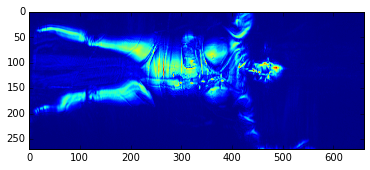

In [21]:
transformed_data = []
for i in range(0,16):
    increment = 10
    print((i * increment), (i * increment) + 340)
#     print(data[(i * increment):(i * increment) + 170,:,i])
    #transformed_data.append(data[(i * increment) + 50:(i * increment) + 320,:,i])
    data[170 + (i * increment): 512-(i * increment):,i]
    print(data.shape)
    plt.imshow(data[130:400,:,i])
    print(data[170 + (i * increment): 512-(i * increment):,:,i].shape)
    plt.show()

In [105]:
transformed_data[0].shape

(270, 660)

In [48]:
plt.imshow(data[:,:,4]) 
plt.show()

In [13]:
w = png.Writer(660, 512)
pngfile = open("./frame.png","wb+")
w.write(pngfile, data[:,:,12])
pngfile.close()

NameError: name 'png' is not defined

In [18]:
data[:,:,12]

array([[  3.31961019e-06,   3.18682578e-06,   3.48559070e-06, ...,
          2.98764917e-06,   3.26981603e-06,   3.25321798e-06],
       [  4.16611056e-06,   3.88394392e-06,   4.69724819e-06, ...,
          3.58517900e-06,   3.23661993e-06,   3.91714002e-06],
       [  3.78435561e-06,   3.31961019e-06,   4.86322915e-06, ...,
          3.60177705e-06,   3.43579654e-06,   4.03332615e-06],
       ..., 
       [  4.64745426e-06,   4.76364039e-06,   3.65157121e-06, ...,
          3.23661993e-06,   3.81755171e-06,   3.22002188e-06],
       [  3.51878680e-06,   3.73456146e-06,   3.50218875e-06, ...,
          3.53538485e-06,   4.01672833e-06,   4.29889496e-06],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32)

In [15]:
for x in range(0,11):
    plt.imshow(data[:,:,x]) 
    plt.show()

In [24]:
i


15